# Using Spyking Circus

In [1]:
%load_ext autoreload
import os
import numpy as np
import scipy.io as sio
import h5py
import matplotlib.pyplot as plt 

# signal processing 
import scipy.signal as ssignal

# fancy plot stuff 
import sciplotlib.style as splstyle
import sciplotlib.polish as splpolish 

import pandas as pd
import sys

sys.path.insert(1, '/home/timsit/mecp2/python/')
import mea_util 
import plot_grid

## Load matlab file

In [2]:
mat_filepath = '/home/timsit/mecp2/data/PAT200219_2C_DIV17.mat'
f = h5py.File(mat_filepath)
data_dict = {}
for k, v in f.items():
    data_dict[k] = np.array(v)

/home/timsit/.conda/envs/mecp2/lib/python3.7/site-packages/ipykernel_launcher.py:2: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  


array([[47., 48., 46., 45., 38., 37., 28., 36., 27., 17., 26., 16., 35.,
        25., 15., 14., 24., 34., 13., 23., 12., 22., 33., 21., 32., 31.,
        44., 43., 41., 42., 52., 51., 53., 54., 61., 62., 71., 63., 72.,
        82., 73., 83., 64., 74., 84., 85., 75., 65., 86., 76., 87., 77.,
        66., 78., 67., 68., 55., 56., 58., 57.]])

In [100]:
mat_filepath = '/home/timsit/mecp2/data/PAT200219_2C_DIV170002.mat'
mea_util.mea_mat_to_numpy(mat_filepath)

/home/timsit/.conda/envs/mecp2/lib/python3.7/site-packages/ipykernel_launcher.py:4: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  after removing the cwd from sys.path.


NameError: name 'original_file_name' is not defined

## Make probe file

see: https://spyking-circus.readthedocs.io/en/latest/code/probe.html

For MEA with 252 channels, a spike can usually be seen in a physical radius of 250 uM

Interelectrode distance is 200 uM I think. Assuming we are using the 60tMEA200/30iR-ITO (page 18).
See section 4.18 for the layout: https://www.multichannelsystems.com/sites/multichannelsystems.com/files/documents/manuals/MEA_Manual.pdf

In [ ]:
probe_file_text = """
total_nb_channels = 60
radius = 250

channel_groups = {
    1: {
        'channels': list([12, 13, 14, 15, 16, 17, 
                          21, 22, 23, 24, 25, 26, 27, 28,
                          31, 32, 33, 34, 35, 36, 37, 38, 
                          41, 42, 43, 44, 45, 46, 47, 48,
                          51, 52, 53, 54, 55, 56, 57, 58,
                          61, 62, 63, 64, 65, 66, 67, 68,
                          71, 72, 73, 74, 75, 76, 77, 78,
                          82, 83, 84, 85, 86, 87])
        'graph': [],
        'geometry': {
            17: [0.0, 200.0],
            16: [0.0, 400.0],
            15: [0.0, 600.0],
            14: [0.0, 800.0],
            13: [0.0, 1000.0],
            12: [0.0, 1200.0],
            28: [200.0, 0.0],
            27: [200.0, 200.0],
            26: [200.0, 400.0],
            25: [200.0, 600.0],
            24: [200.0, 800.0],
            23: [200.0, 1000.0],
            22: [200.0, 1200.0],
            21: [200.0, 1400.0], 
            38: [400.0, 0.0],
            37: [400.0, 200.0],
            36: [400.0, 400.0],
            35: [400.0, 600.0],
            34: [400.0, 800.0], 
            33: [400.0, 1000.0],
            32: [400.0, 1200.0],
            31: [400.0, 1400.0],
            48: [600.0, 0.0],
            47: [600.0, 200.0],
            46: [600.0, 400.0],
            45: [600.0, 600.0],
            44: [600.0, 800.0],
            43: [600.0, 1000.0],
            42: [600.0, 1200.0],
            41: [600.0, 1400.0],
            58: [800.0, 0.0],
            57: [800.0, 200.0],
            56: [800.0, 400.0],
            55: [800.0, 600.0],
            54: [800.0, 800.0],
            53: [800.0, 1000.0], 
            52: [800.0, 1200.0],
            51: [800.0, 1400.0],
            68: [1000.0, 0.0],
            67: [1000.0, 200.0],
            66: [1000.0, 400.0],
            65: [1000.0, 600.0],
            64: [1000.0, 800.0],
            63: [1000.0, 1000.0],
            62: [1000.0, 1200.0],
            61: [1000.0, 1400.0],
            78: [1200.0, 0.0],
            77: [1200.0, 200.0],
            76: [1200.0, 400.0],
            75: [1200.0, 600.0],
            74: [1200.0, 800.0],
            73: [1200.0, 1000.0],
            72: [1200.0, 1200.0],
            71: [1200.0, 1400.0],
            87: [1400.0, 200.0],
            86: [1400.0, 400.0],
            85: [1400.0, 600.0],
            84: [1400.0, 800.0],
            83: [1400.0, 1000.0],
            82: [1400.0, 1200.0]
        }
        
    }


}


"""

In [ ]:
# new updated probe file 

total_nb_channels = 60
radius = 250

channel_groups = {
    1: {
        'channels': range(60),
        'graph': [],
        'geometry': {
            0: [0.0, 1200.0],
            1: [0.0, 1000.0],
            2: [0.0, 800.0],
            3: [0.0, 600.0],
            4: [0.0, 400.0],
            5: [0.0, 200.0],
            6: [200.0, 1400.0], 
            7: [200.0, 1200.0],
            8: [200.0, 1000.0],
            9: [200.0, 800.0],
            10: [200.0, 600.0],
            11: [200.0, 400.0],
            12: [200.0, 200.0],
            13: [200.0, 0.0],
            14: [400.0, 1400.0],
            15: [400.0, 1200.0],
            16: [400.0, 1000.0],
            17: [400.0, 800.0], 
            18: [400.0, 600.0],
            19: [400.0, 400.0],
            20: [400.0, 200.0],
            21: [400.0, 0.0],
            22: [600.0, 1400.0],     
            23: [600.0, 1200.0],
            24: [600.0, 1000.0],
            25: [600.0, 800.0],
            26: [600.0, 600.0],
            27: [600.0, 400.0],
            28: [600.0, 200.0],
            29: [600.0, 0.0],
            30: [800.0, 1400.0],
            31: [800.0, 1200.0],
            32: [800.0, 1000.0], 
            33: [800.0, 800.0],
            34: [800.0, 600.0],
            35: [800.0, 400.0],
            36: [800.0, 200.0],
            37: [800.0, 0.0],
            38: [1000.0, 1400.0],
            39: [1000.0, 1200.0],
            40: [1000.0, 1000.0],
            41: [1000.0, 800.0],
            42: [1000.0, 600.0],
            43: [1000.0, 400.0],
            44: [1000.0, 200.0],
            45: [1000.0, 0.0],
            46: [1200.0, 1400.0],
            47: [1200.0, 1200.0],
            48: [1200.0, 1000.0],
            49: [1200.0, 800.0],
            50: [1200.0, 600.0],
            51: [1200.0, 400.0],
            52: [1200.0, 200.0],
            53: [1200.0, 0.0],
            54: [1400.0, 1200.0],
            55: [1400.0, 1000.0],
            56: [1400.0, 800.0],
            57: [1400.0, 600.0],
            58: [1400.0, 400.0],
            59: [1400.0, 200.0],
            
        }
        
    }


}


## Make numpy file

In [19]:
np.shape(data_dict['dat'][0])

(3002500,)

In [21]:
data = np.array(
    [
        (data_dict['fs'][0][0], data_dict['dat'])
    ],
    dtype=[
        ('sampling_rate', 'float32'), ('data', 'float32')
    ]
) 

ValueError: setting an array element with a sequence.

In [9]:
original_filename = mat_filepath.split('.')[0]

In [18]:
channel_sorted_idx = np.argsort(data_dict['channels'][0])
sorted_data_matrix = data_dict['dat'][channel_sorted_idx, :]

In [17]:
print('Sorted channel numbers')
print(data_dict['channels'][0][channel_sorted_idx])

Sorted channel numbers
[12. 13. 14. 15. 16. 17. 21. 22. 23. 24. 25. 26. 27. 28. 31. 32. 33. 34.
 35. 36. 37. 38. 41. 42. 43. 44. 45. 46. 47. 48. 51. 52. 53. 54. 55. 56.
 57. 58. 61. 62. 63. 64. 65. 66. 67. 68. 71. 72. 73. 74. 75. 76. 77. 78.
 82. 83. 84. 85. 86. 87.]


In [21]:
original_filename

'/home/timsit/mecp2/data/PAT200219_2C_DIV17'

In [20]:
np.save(original_filename + '.npy', sorted_data_matrix)

## Make compatible HDF5 file 

Multichannel System HDF5 data format: https://www.multichannelsystems.com/sites/multichannelsystems.com/files/documents/manuals/HDF5%20MCS%20Raw%20Data%20Definition.pdf

# Read the output from spyking circus

In [ ]:
from circus.shared.parser import CircusParser
from circus.shared.files import load_data
from pylab import *
params    = CircusParser('silico_0.dat')
params.get_data_file()
N_e       = params.getint('data', 'N_e') # The number of channels
N_t       = params.getint('detection', 'N_t') # The temporal width of the template
templates = load_data(params, 'templates') # To load the templates
temp_i = templates[:, i].toarray().reshape(N_e, N_t) # To read the template i as a 2D matrix
imshow(temp_i, aspect='auto')

### Cluster file

In [237]:
import h5py
# cluster_file = '/home/timsit/mecp2/python/spike_detection/PAT200219_2C_DIV17/PAT200219_2C_DIV17.clusters-merged.hdf5'
cluster_file = '/home/timsit/mecp2/data/PAT200219_2C_DIV170002/PAT200219_2C_DIV170002/PAT200219_2C_DIV170002.clusters-merged.hdf5'
cluster = h5py.File(cluster_file, 'r')

In [242]:
template_to_electrode_map = cluster['electrodes'][()]

In [234]:
template_file = '/home/timsit/mecp2/data/PAT200219_2C_DIV170002/PAT200219_2C_DIV170002/PAT200219_2C_DIV170002.templates-merged.hdf5'
template = h5py.File(template_file, 'r')

In [74]:
template.keys()

<KeysViewHDF5 ['limits', 'maxlag', 'maxoverlap', 'norms', 'purity', 'supports', 'temp_data', 'temp_shape', 'temp_x', 'temp_y', 'version']>

In [235]:
template_support = template['supports'][()].astype(int)

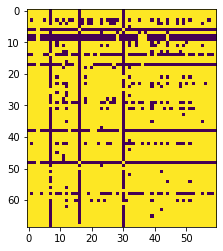

In [236]:
plt.imshow(template_support)

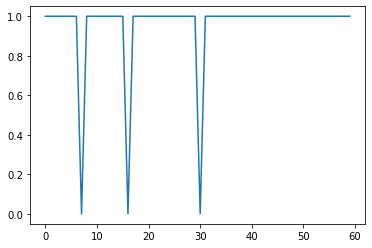

In [233]:
fig, ax = plt.subplots()

# the support seem to show where (which electrode) the cluster is detected
cluster_idx = 0
ax.plot(template['supports'][cluster_idx, :])


### Spike sorting result

In [151]:
# result_file = '/home/timsit/mecp2/python/spike_detection/PAT200219_2C_DIV17/PAT200219_2C_DIV17.result-merged.hdf5'
result_file = '/home/timsit/mecp2/data/PAT200219_2C_DIV170002/PAT200219_2C_DIV170002/PAT200219_2C_DIV170002.result-merged.hdf5'
spike_sorting_result = h5py.File(result_file, 'r')

In [153]:
spike_sorting_result.keys()

<KeysViewHDF5 ['amplitudes', 'spiketimes']>

In [157]:
spike_sorting_result['spiketimes']

<HDF5 group "/spiketimes" (69 members)>

In [245]:
# make dataframe of the spike of each template 
template_spiketime_dict = dict()
template_spiketime_dict['template'] = list()
template_spiketime_dict['spiketime'] = list()
template_spiketime_dict['electrode'] = list()



fs = 25000
for template_n, template_field in enumerate(spike_sorting_result['spiketimes']):
    template_spiketimes = spike_sorting_result['spiketimes'][template_field][()]
    template_spiketime_dict['template'].extend(np.repeat(template_n, len(template_spiketimes)))
    template_spiketime_dict['spiketime'].extend(template_spiketimes / fs)
    
    # Add electrode number
    electrode_num = template_to_electrode_map[template_n]
    template_spiketime_dict['electrode'].extend(np.repeat(electrode_num, len(template_spiketimes)))

template_spiketime_df = pd.DataFrame.from_dict(template_spiketime_dict)



In [246]:
template_spiketime_df

,template,spiketime,electrode
0,0,0.83432,0
1,0,1.01060,0
2,0,1.06120,0
3,0,1.38136,0
4,0,2.13840,0
...,...,...,...
43231,68,116.90112,59
43232,68,116.91368,59
43233,68,116.94180,59
43234,68,117.72180,59


In [160]:
spike_sorting_result['spiketimes']

<HDF5 group "/spiketimes" (69 members)>

In [150]:
a = spike_sorting_result['spiketimes']['temp_0']

In [152]:
result_file

'/home/timsit/mecp2/data/PAT200219_2C_DIV170002/PAT200219_2C_DIV170002/PAT200219_2C_DIV170002.result-merged.hdf5'

In [102]:
# basis_file = '/home/timsit/mecp2/python/spike_detection/PAT200219_2C_DIV17/PAT200219_2C_DIV17.basis.hdf5'
basis_file = '/home/timsit/mecp2/data/PAT200219_2C_DIV170002/PAT200219_2C_DIV170002/PAT200219_2C_DIV170002.basis.hdf5'
basis = h5py.File(basis_file, 'r')

In [103]:
basis_waveform = basis['waveforms']

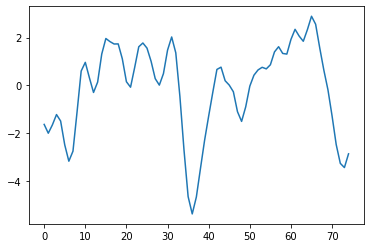

In [129]:
fig, ax = plt.subplots()
ax.plot(basis_waveform[39, :])

## Compare spyking circus and the wavelet method for spike detection 

In [185]:
def hdf_loadmat(mat_filepath):
    
    f = h5py.File(mat_filepath)
    data_dict = {}
    for k, v in f.items():
        data_dict[k] = np.array(v)
    
    return data_dict

In [192]:
raw_data_file = '/home/timsit/mecp2/data/PAT200219_2C_DIV170002.mat'
raw_data = hdf_loadmat(raw_data_file)
cwt_spike_file = '/home/timsit/mecp2/data/PAT200219_2C_DIV170002/cwt_L0_spikes.mat'
cwt_spike = sio.loadmat(cwt_spike_file)['spike_matrix']



/home/timsit/.conda/envs/mecp2/lib/python3.7/site-packages/ipykernel_launcher.py:3: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  This is separate from the ipykernel package so we can avoid doing imports until


In [333]:
# reorder the channels 
channel_num = raw_data['channels'][0]
channel_idx = np.argsort(channel_num)
sorted_channel_num = channel_num[channel_idx]

cwt_spike_ordered = cwt_spike[:, channel_idx]

In [334]:
sorted_channel_num

array([12., 13., 14., 15., 16., 17., 21., 22., 23., 24., 25., 26., 27.,
       28., 31., 32., 33., 34., 35., 36., 37., 38., 41., 42., 43., 44.,
       45., 46., 47., 48., 51., 52., 53., 54., 55., 56., 57., 58., 61.,
       62., 63., 64., 65., 66., 67., 68., 71., 72., 73., 74., 75., 76.,
       77., 78., 82., 83., 84., 85., 86., 87.])

### Compare number of spikes detected from each channel 

In [354]:
cwt_spike_count_ordered = np.sum(cwt_spike_ordered, axis=0)

In [355]:
def add_zero_spikecount(spyking_circus_spike_count, num_electrode=60):
    
    for electrode in np.arange(num_electrode):
        if electrode not in spyking_circus_spike_count.index:
            spyking_circus_spike_count.loc[electrode] = 0
            # zero_spike_electrode = pd.DataFrame([0])
            # zero_spike_electrode.name = electrode
            # spyking_circus_spike_count = spyking_circus_spike_count.append(zero_spike_electrode)
            
    return spyking_circus_spike_count.sort_index()

In [356]:
spyking_circus_spike_count = template_spiketime_df.groupby('electrode').count()['spiketime']
spyking_circus_spike_count = add_zero_spikecount(spyking_circus_spike_count)

In [357]:
spyking_circus_spike_count

electrode
0      412
1      497
2        5
3        0
4     2019
5      347
6     1071
7     1619
8        0
9       85
10       0
11     186
12    3134
13     307
14     490
15      56
16     249
17      60
18     239
19     377
20     395
21    1034
22     845
23     302
24    1669
25      66
26     365
27     934
28       0
29    2502
30      17
31       0
32      39
33     366
34     486
35     370
36    2559
37     888
38    1631
39    2001
40    5180
41     628
42      20
43      41
44    1059
45     276
46     446
47    1341
48      23
49       3
50     518
51     155
52       4
53      21
54    2898
55     600
56     771
57     807
58     561
59     262
Name: spiketime, dtype: int64

In [372]:
def plot_grid_layout(fig=None, ax=None, grid_matrix=None, grid_channel_num_matrix=None, plot_grid_matrix=True,
                    text_size=8, text_color='black', skip_nan=True):
    if (fig is None) and (ax is None):
        fig, ax = plt.subplots()
        fig.set_size_inches(4, 4)

    if plot_grid_matrix:
        if grid_matrix is not None:
            ax.imshow(grid_matrix)
        else:
            ax.imshow(np.tile(np.nan, np.shape(grid_channel_num_matrix)))

    if grid_channel_num_matrix is not None:

        for i in range(np.shape(grid_channel_num_matrix)[0]):
            for j in range(np.shape(grid_channel_num_matrix)[1]):
                if skip_nan:
                    if ~np.isnan(grid_channel_num_matrix[i, j]):
                        text = ax.text(j, i, int(grid_channel_num_matrix[i, j]), ha='center', va='center', 
                                       color=text_color,
                                  size=text_size)
                else:
                    text = ax.text(j, i, grid_channel_num_matrix[i, j], ha='center', va='center', color=text_color,
                                  size=text_size)

    # Annotate channel number

    return fig, ax

/home/timsit/.conda/envs/mecp2/lib/python3.7/site-packages/matplotlib/image.py:397: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/home/timsit/.conda/envs/mecp2/lib/python3.7/site-packages/matplotlib/image.py:398: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/home/timsit/.conda/envs/mecp2/lib/python3.7/site-packages/matplotlib/image.py:405: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/home/timsit/.conda/envs/mecp2/lib/python3.7/site-packages/matplotlib/image.py:410: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/home/timsit/.conda/envs/mecp2/lib/python3.7/site-packages/numpy/ma/core.py:722: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


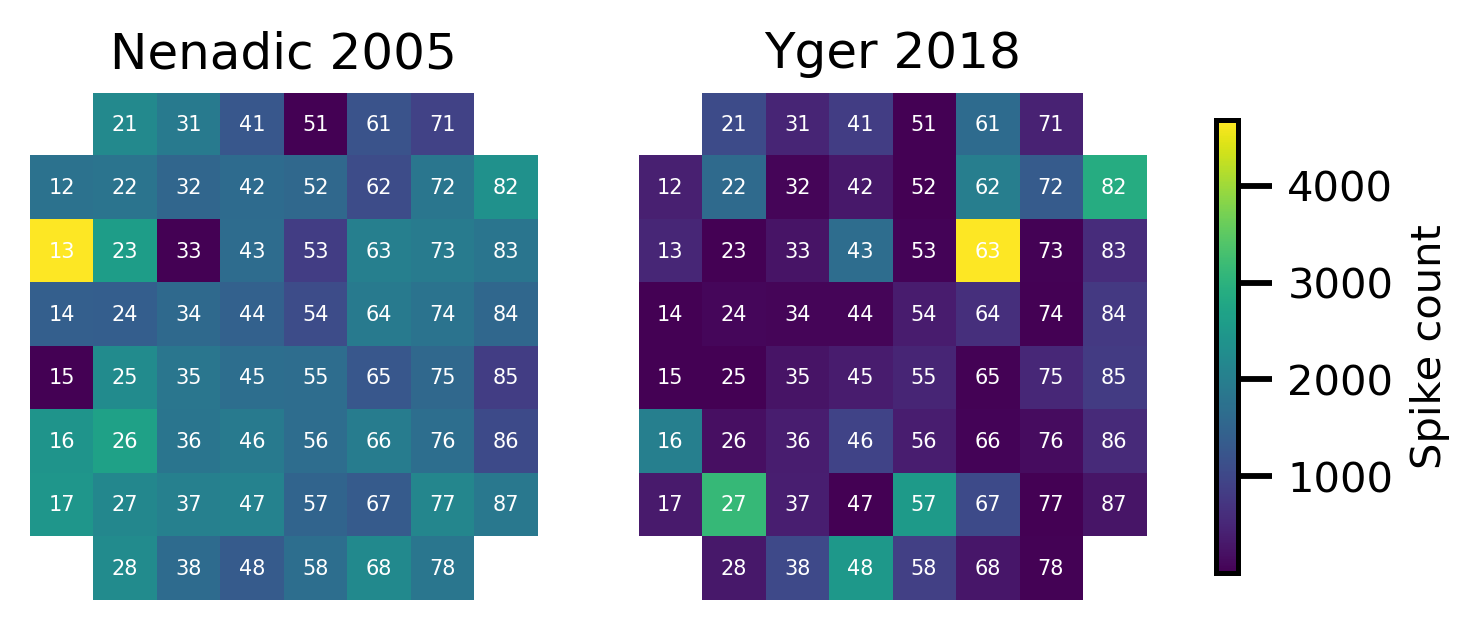

In [388]:
%autoreload
add_electrode_num_text = False

with plt.style.context(splstyle.get_style('nature-reviews')):
    fig, axs = plt.subplots(1, 2)
    
    vmin = np.nanmin(cwt_spike_sum_matrix)
    vmax = np.nanmax(cwt_spike_sum_matrix)
    
    cwt_spike_sum_matrix = mea_util.make_grid_matrix(cwt_spike_count_ordered)
    im0 = axs[0].imshow(cwt_spike_sum_matrix, vmin=vmin, vmax=vmax)
    
    # fig.colorbar(ax=axs[0])
    spyking_circus_spike_sum_matrix = mea_util.make_grid_matrix(spyking_circus_spike_count.values)
    im1 = axs[1].imshow(spyking_circus_spike_sum_matrix, vmin=vmin, vmax=vmax)
    
    axs[0].set_title('Nenadic 2005', size=12)
    axs[1].set_title('Yger 2018', size=12)
    
    grid_channel_num_matrix = mea_util.make_grid_matrix(sorted_channel_num)
    fig, axs[0] = plot_grid_layout(fig=fig, ax=axs[0], grid_channel_num_matrix=grid_channel_num_matrix,
                                  text_color='white', text_size=5)
    
    fig, axs[1] = plot_grid_layout(fig=fig, ax=axs[1], grid_channel_num_matrix=grid_channel_num_matrix,
                                  text_color='white', text_size=5)
    
    axs[0].axis('off')
    axs[1].axis('off')
    
    cbar = fig.colorbar(im0, ax=axs[:], shrink=0.5,)
    cbar.ax.tick_params(labelsize=10)
    cbar.set_label(label='Spike count', size=10)
    
    fig_folder = '/home/timsit/mecp2/python/figures/spike_detection'
    fig_name = 'PAT200219_2C_DIV170002_spike_count_cwt_vs_spyking_circus'
    fig_ext = '.png'
    fig.savefig(os.path.join(fig_folder, fig_name), dpi=300, bbox_inches='tight')

In [353]:
np.nanmax(spyking_circus_spike_sum_matrix)

5180.0

In [324]:
cwt_spike_count_ordered

array([1774, 4684, 1416,    3, 2425, 2469, 2213, 1809, 2599, 1400, 2256,
       2679, 2173, 2264, 1929, 1553,    1, 1596, 1843, 1813, 2035, 1636,
       1276, 1635, 1655, 1461, 1694, 1931, 2070, 1343,    1, 1578,  849,
       1083, 1667, 1676, 1506, 1693, 1200, 1081, 2031, 1929, 1272, 1967,
       1351, 2216,  925, 1841, 1942, 1783, 1583, 1700, 2152, 1840, 2368,
       1817, 1567,  844, 1057, 1882], dtype=uint64)

In [327]:
np.shape(cwt_spike_count_ordered)

(60,)

In [328]:
np.shape(spyking_circus_spike_count)

(61,)

In [389]:
np.sum(cwt_spike_count_ordered)

102036

In [390]:
np.sum(spyking_circus_spike_count)

43236